## Randall Mencias
## Juan Francisco Cisneros
## Josue Cardenas

### DESCRIPCION DEL PROYECTO
- ....

### LIBRERIAS

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re 
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # text preprocessing
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### ANALISIS EXPLORATORIO DE DATOS

#### CARGA DE DATOS

In [110]:
# Where data is stored
pathTest = "../resources/clean_data/test_clean.csv"
pathTrain = "../resources/clean_data/train_clean.csv"

# Read data
dfTest = pd.read_csv(pathTest)
dfTrain = pd.read_csv(pathTrain)

# Size of the train and test data
print("Train data size: ", dfTrain.shape)
print("Test data size: ", dfTest.shape)

Train data size:  (161297, 7)
Test data size:  (53200, 7)


In [111]:
dfTest.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,53641,Alesse,Abnormal Uterine Bleeding,"""I&#039;ve been using Alesse 28 for a little o...",10,22-Jan-14,8
1,195548,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for almost three months...",10,2001-Mar-12,6
2,195659,Aviane,Abnormal Uterine Bleeding,"""My doctor put me on Aviane to suppress my per...",9,16-Aug-11,9
3,195622,Aviane,Abnormal Uterine Bleeding,"""It&#039;s only been a month so I can&#039;t g...",8,10-Sep-12,4
4,147702,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for about a year and a ...",9,13-Mar-10,4


In [112]:
dfTrain.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2003-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


#### Plot Columns

In [113]:
print("Test data shape, Rows and Columns: ", dfTest.shape)
print("Train data shape, Rows and Columns: ", dfTrain.shape)
print()
print("Test data columns: ", dfTest.columns)
print("Train data columns: ", dfTrain.columns)

Test data shape, Rows and Columns:  (53200, 7)
Train data shape, Rows and Columns:  (161297, 7)

Test data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Train data columns:  Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [114]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [115]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53200 entries, 0 to 53199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53200 non-null  int64 
 1   drugName     53200 non-null  object
 2   condition    53200 non-null  object
 3   review       53200 non-null  object
 4   rating       53200 non-null  int64 
 5   date         53200 non-null  object
 6   usefulCount  53200 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.8+ MB


In [116]:
dfTrain.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [117]:
# Check for missing values
dfTrain.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [118]:
# Drop all rows with missing values
dfTrain.dropna(inplace=True)
dfTrain.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [119]:
dfTest.describe()

,uniqueID,rating,usefulCount
count,53200.000000,53200.000000,53200.000000
mean,116465.986485,6.978289,28.170282
std,67001.804385,3.286389,36.284596
min,0.000000,1.000000,0.000000
25%,58371.500000,4.000000,6.000000
50%,116418.500000,8.000000,16.000000
75%,174645.250000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [120]:
# Check for missing values
dfTest.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

#### Plot Columns

##### Rating

In [121]:
# Raitings distribution
dfTrain['rating'].value_counts()

10    50745
9     27379
1     21504
8     18791
7      9395
5      7959
2      6879
3      6465
6      6301
4      4980
Name: rating, dtype: int64

<Axes: title={'center': 'Ratings distribution in train data'}, xlabel='Rating', ylabel='Count'>

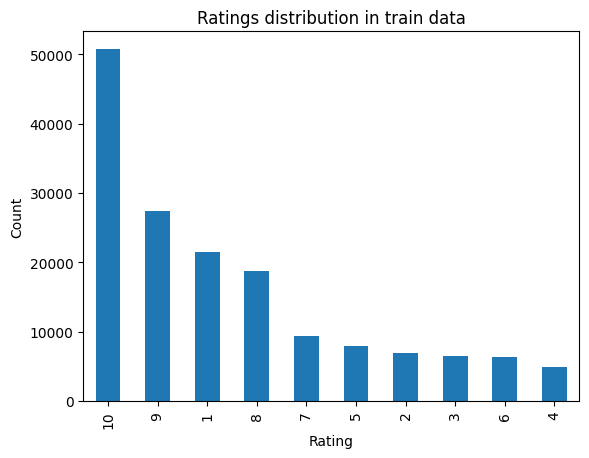

In [122]:
dfTrain['rating'].value_counts().plot(kind='bar', title='Ratings distribution in train data',xlabel='Rating', ylabel='Count')


In [123]:
dfTest['rating'].value_counts()

10    16868
9      9072
1      7230
8      6087
7      3056
5      2672
2      2308
3      2185
6      2090
4      1632
Name: rating, dtype: int64

<Axes: title={'center': 'Ratings distribution in test data'}, xlabel='Rating', ylabel='Count'>

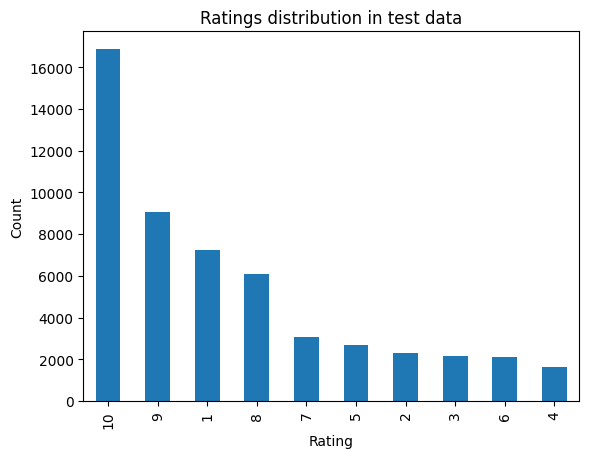

In [124]:
dfTest['rating'].value_counts().plot(kind='bar', title='Ratings distribution in test data',xlabel='Rating', ylabel='Count')

#### Matrix Correlation

In [125]:
# Plot Correlation Matrix
corr = dfTrain.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_1675/2031966965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfTrain.corr()


,uniqueID,rating,usefulCount
uniqueID,1.000000,0.014896,0.015945
rating,0.014896,1.000000,0.234379
usefulCount,0.015945,0.234379,1.000000


In [126]:
corr = dfTest.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_1675/1667596228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfTest.corr()


,uniqueID,rating,usefulCount
uniqueID,1.000000,0.019082,0.020433
rating,0.019082,1.000000,0.237710
usefulCount,0.020433,0.237710,1.000000


As we can see, there is a strong correlation between the variables, which is expected since they are all related to the same topic.

#### Drug Name Label Encoding

In [127]:
drugName = dfTrain['drugName'].value_counts()
drugName

Levonorgestrel                       3631
Etonogestrel                         3321
Ethinyl estradiol / norethindrone    2750
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2033
                                     ... 
Colace                                  1
DermaZinc Shampoo                       1
Lillow                                  1
Magaldrate / simethicone                1
Grifulvin V                             1
Name: drugName, Length: 3431, dtype: int64

In [128]:
# Transform DrugName to a categorical variable, save the categories and the number of categories
dfTrain['drugName'] = dfTrain['drugName'].astype('category')
# Save the categories in between drugname and condition
dfTrain['drugName_cat'] = dfTrain['drugName'].cat.codes
dfTrain.sort_values(by=['drugName'], inplace=True)
dfTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat
9892,163935,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10,2007-Dec-09,6,0
18402,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,23-Sep-09,20,1
77682,70749,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Update on prior review: after being on trium...",10,30-Sep-15,16,2
59740,70709,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I started taking Triumeq almost two years aft...",9,2001-Sep-16,17,2
90400,70706,Abacavir / dolutegravir / lamivudine,HIV Infection,"""After taking complera for 5 years, switched t...",4,2007-Oct-16,10,2
...,...,...,...,...,...,...,...,...
47965,163126,ella,Emergency Contraception,"""I took Ella 3 days after a little accident ha...",8,30-Mar-17,21,3429
159774,163077,ella,Emergency Contraception,"""I had a two min unprotected sex with my bf, ...",2,2006-Oct-17,1,3429
24189,53297,femhrt,0</span> users found this comment helpful.,"""I was on femHRT for four months and had BV (b...",1,29-Nov-10,0,3430
578,53296,femhrt,Postmenopausal Symptoms,"""This medication completely changed my life fo...",10,11-Jan-11,42,3430


In [129]:
# Number of categories in train 
print("Number of categories in train data: ", dfTrain['drugName_cat'].nunique())

Number of categories in train data:  3431


In [130]:
# Show DrugName and its unique DrugName_cat
dfTrain[['drugName', 'drugName_cat']].drop_duplicates().sort_values('drugName_cat')

,drugName,drugName_cat
9892,A + D Cracked Skin Relief,0
18402,A / B Otic,1
77682,Abacavir / dolutegravir / lamivudine,2
40360,Abacavir / lamivudine / zidovudine,3
21862,Abatacept,4
...,...,...
31617,Zyvox,3426
50955,ZzzQuil,3427
59226,depo-subQ provera 104,3428
106729,ella,3429


<Axes: title={'center': 'DrugName_Cat and the number of appearances'}, xlabel='DrugName_Cat', ylabel='Count'>

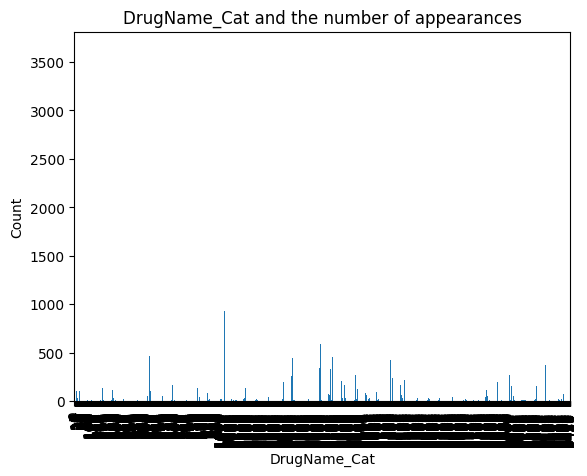

In [131]:
# in a graph, plot the DrugName_Cat and the number of appearances
drugNameCat = dfTrain['drugName_cat'].value_counts().sort_index()
# graph only the first 20 categories
drugNameCat.plot(kind='bar', title='DrugName_Cat and the number of appearances',xlabel='DrugName_Cat', ylabel='Count')


In [132]:
# DrugName of the test data
drugNameTest = dfTest['drugName'].value_counts()
drugNameTest

Levonorgestrel                       1265
Etonogestrel                         1081
Ethinyl estradiol / norethindrone     869
Nexplanon                             734
Ethinyl estradiol / norgestimate      649
                                     ... 
Guarana                                 1
Berinert                                1
Firazyr                                 1
Icatibant                               1
Yellow fever vaccine                    1
Name: drugName, Length: 2629, dtype: int64

In [133]:
# Not all drug names in the test data are in the train data
# Put in a map the drug names of the test data with its DrugName_Cat
drugNameTestMap = {}
for drugName in drugNameTest.index:
    if drugName in dfTrain['drugName'].values:
        drugNameTestMap[drugName] = dfTrain[dfTrain['drugName'] == drugName]['drugName_cat'].values[0]
    else:
        drugNameTestMap[drugName] = -1
# show me the "ella" drug category
drugNameTestMap

{'Levonorgestrel': 1745,
 'Etonogestrel': 1186,
 'Ethinyl estradiol / norethindrone': 1181,
 'Nexplanon': 2145,
 'Ethinyl estradiol / norgestimate': 1182,
 'Ethinyl estradiol / levonorgestrel': 1179,
 'Phentermine': 2413,
 'Sertraline': 2799,
 'Escitalopram': 1147,
 'Mirena': 2018,
 'Implanon': 1556,
 'Gabapentin': 1345,
 'Bupropion': 517,
 'Miconazole': 1987,
 'Duloxetine': 1038,
 'Venlafaxine': 3227,
 'Tramadol': 3068,
 'Clonazepam': 724,
 'Citalopram': 683,
 'Medroxyprogesterone': 1906,
 'Bupropion / naltrexone': 518,
 'Varenicline': 3213,
 'Contrave': 777,
 'Lexapro': 1753,
 'Metronidazole': 1978,
 'Drospirenone / ethinyl estradiol': 1026,
 'Zoloft': 3391,
 'Cymbalta': 825,
 'Tioconazole': 3036,
 'Depo-Provera': 888,
 'Liraglutide': 1784,
 'Skyla': 2829,
 'Fluoxetine': 1308,
 'Quetiapine': 2597,
 'Lo Loestrin Fe': 1793,
 'Alprazolam': 162,
 'Amitriptyline': 195,
 'Chantix': 628,
 'Doxycycline': 1014,
 'Desvenlafaxine': 905,
 'Trazodone': 3080,
 'Suprep Bowel Prep Kit': 2923,
 'Paro

In [134]:
# Lets transform the drugName of the test data to DrugName_Cat, using the map
dfTest['drugName_cat'] = dfTest['drugName'].map(drugNameTestMap)
dfTest

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat
0,53641,Alesse,Abnormal Uterine Bleeding,"""I&#039;ve been using Alesse 28 for a little o...",10,22-Jan-14,8,128
1,195548,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for almost three months...",10,2001-Mar-12,6,333
2,195659,Aviane,Abnormal Uterine Bleeding,"""My doctor put me on Aviane to suppress my per...",9,16-Aug-11,9,333
3,195622,Aviane,Abnormal Uterine Bleeding,"""It&#039;s only been a month so I can&#039;t g...",8,10-Sep-12,4,333
4,147702,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for about a year and a ...",9,13-Mar-10,4,333
...,...,...,...,...,...,...,...,...
53195,164454,Diclofenac,zen Shoulde,"""The medication has been somewhat helpful with...",5,24-Dec-14,22,944
53196,87420,Naproxen,zen Shoulde,"""Prescribed 500 mg for pain in right shoulder ...",1,24-Jun-17,2,2100
53197,111788,Relafen,zen Shoulde,"""Very helpful for my frozen shoulder pain with...",9,12-Nov-11,38,2644
53198,18328,Voltaren,zen Shoulde,"""The medication has been somewhat helpful with...",5,24-Dec-14,22,3288


<Axes: title={'center': 'DrugName_Cat and the number of appearances'}, xlabel='DrugName_Cat', ylabel='Count'>

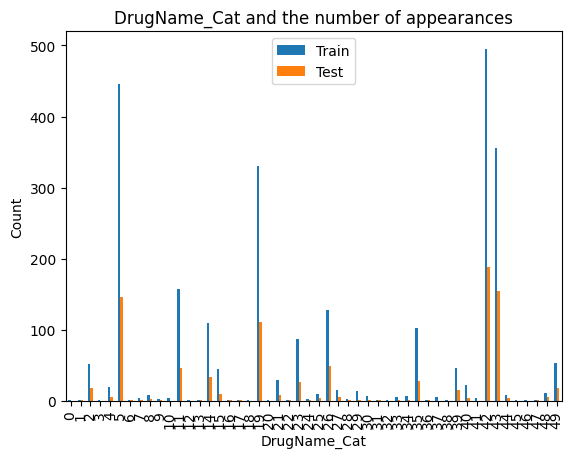

In [135]:
# Compare the count of DrugName_cat in train and test data in a graph
drugNameCatTrain = dfTrain['drugName_cat'].value_counts().sort_index()
drugNameCatTest = dfTest['drugName_cat'].value_counts().sort_index()
# in the same graph, plot the DrugName_Cat and the number of appearances of train and test data
drugNamesCat = pd.concat([drugNameCatTrain, drugNameCatTest], axis=1)
drugNamesCat.columns = ['Train', 'Test']
drugNamesCat[0:50].plot(kind='bar', title='DrugName_Cat and the number of appearances',xlabel='DrugName_Cat', ylabel='Count')

#### Condition Label Encoding

In [136]:
# if condition starts with a number, it will be deleted
dfTrain = dfTrain[~dfTrain['condition'].str.startswith(('0','1','2','3','4','5','6','7','8','9'))]
# Show Condition and its unique Condition_cat
# Delete Nan
dfTrain = dfTrain.dropna()


In [137]:
conditionTrain = dfTrain['condition'].value_counts()
conditionTrain

Birth Control                              28788
Depression                                  9069
Pain                                        6145
Anxiety                                     5904
Acne                                        5588
                                           ...  
m Pain Disorde                                 1
acial Lipoatrophy                              1
Dermatitis Herpeti                             1
Cerebral Edema                                 1
Hyperuricemia Secondary to Chemotherapy        1
Name: condition, Length: 811, dtype: int64

In [138]:
# Transform Condition to a categorical variable, save the categories and the number of categories
dfTrain['condition'] = dfTrain['condition'].astype('category')
# Save the categories in between drugname and condition
dfTrain['condition_cat'] = dfTrain['condition'].cat.codes
dfTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
9892,163935,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10,2007-Dec-09,6,0,80
18402,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,23-Sep-09,20,1,515
77682,70749,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Update on prior review: after being on trium...",10,30-Sep-15,16,2,282
59740,70709,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I started taking Triumeq almost two years aft...",9,2001-Sep-16,17,2,282
90400,70706,Abacavir / dolutegravir / lamivudine,HIV Infection,"""After taking complera for 5 years, switched t...",4,2007-Oct-16,10,2,282
...,...,...,...,...,...,...,...,...,...
126244,163064,ella,Emergency Contraception,"""I wanted to share my experience particularly ...",10,28-Nov-17,2,3429,230
47965,163126,ella,Emergency Contraception,"""I took Ella 3 days after a little accident ha...",8,30-Mar-17,21,3429,230
159774,163077,ella,Emergency Contraception,"""I had a two min unprotected sex with my bf, ...",2,2006-Oct-17,1,3429,230
578,53296,femhrt,Postmenopausal Symptoms,"""This medication completely changed my life fo...",10,11-Jan-11,42,3430,569


In [139]:
# Number of categories in train 
print("Number of categories in train data: ", dfTrain['condition_cat'].nunique())

Number of categories in train data:  811


<Axes: title={'center': 'Condition_Cat and the number of appearances'}, xlabel='Condition_Cat', ylabel='Count'>

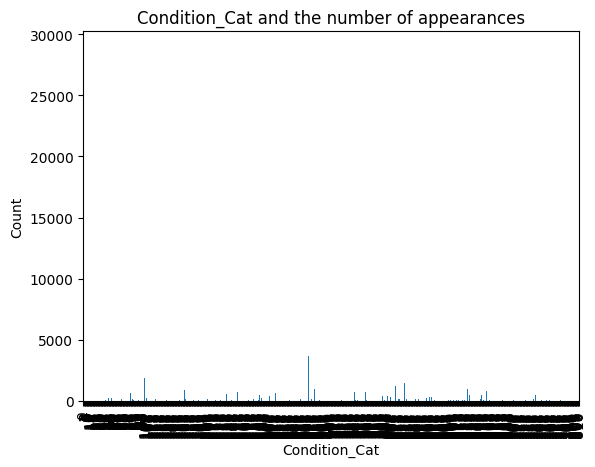

In [140]:
# in a graph, plot the Condition_Cat and the number of appearances
conditionCat = dfTrain['condition_cat'].value_counts().sort_index()
# graph only the first 20 categories
conditionCat.plot(kind='bar', title='Condition_Cat and the number of appearances',xlabel='Condition_Cat', ylabel='Count')

In [141]:
# Condition of the test data
conditionTest = dfTest['condition'].value_counts()
conditionTest

Birth Control                           9648
Depression                              3095
Pain                                    2100
Anxiety                                 1908
Acne                                    1847
                                        ... 
Aspergillosis, Aspergilloma                1
Oppositional Defiant Disorde               1
Oral and Dental Conditions                 1
Organ Transplant, Rejection Reversal       1
Zollinger-Ellison Syndrome                 1
Name: condition, Length: 664, dtype: int64

In [142]:
# Not all conditions in the test data are in the train data
# Put in a map the conditions of the test data with its Condition_Cat
conditionTestMap = {}
for condition in conditionTest.index:
    if condition in dfTrain['condition'].values:
        conditionTestMap[condition] = dfTrain[dfTrain['condition'] == condition]['condition_cat'].values[0]
    else:
        conditionTestMap[condition] = -1

conditionTestMap

{'Birth Control': 92,
 'Depression': 189,
 'Pain': 521,
 'Anxiety': 52,
 'Acne': 7,
 'Bipolar Disorde': 91,
 'Weight Loss': 766,
 'Insomnia': 368,
 'Obesity': 490,
 'ADHD': 0,
 'Emergency Contraception': 230,
 'Vaginal Yeast Infection': 751,
 'Diabetes, Type 2': 200,
 'High Blood Pressure': 313,
 'Smoking Cessation': 670,
 'Abnormal Uterine Bleeding': 4,
 'Bowel Preparation': 100,
 'Migraine': 432,
 'ibromyalgia': 787,
 'Anxiety and Stress': 53,
 'Constipation': 158,
 'Major Depressive Disorde': 414,
 'Chronic Pain': 142,
 'Panic Disorde': 525,
 'Migraine Prevention': 433,
 'Urinary Tract Infection': 745,
 'Opiate Dependence': 501,
 'Osteoarthritis': 510,
 'Muscle Spasm': 446,
 'Erectile Dysfunction': 241,
 'Generalized Anxiety Disorde': 264,
 'Allergic Rhinitis': 22,
 'Irritable Bowel Syndrome': 378,
 'Rheumatoid Arthritis': 628,
 'Bacterial Infection': 79,
 'Cough': 165,
 'Sinusitis': 659,
 'Nausea/Vomiting': 461,
 'GERD': 252,
 'Hepatitis C': 300,
 'Restless Legs Syndrome': 625,
 'H

In [143]:
# Lets transform the condition of the test data to condition_cat, using the map
dfTest['condition_cat'] = dfTest['condition'].map(conditionTestMap)
dfTest

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
0,53641,Alesse,Abnormal Uterine Bleeding,"""I&#039;ve been using Alesse 28 for a little o...",10,22-Jan-14,8,128,4
1,195548,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for almost three months...",10,2001-Mar-12,6,333,4
2,195659,Aviane,Abnormal Uterine Bleeding,"""My doctor put me on Aviane to suppress my per...",9,16-Aug-11,9,333,4
3,195622,Aviane,Abnormal Uterine Bleeding,"""It&#039;s only been a month so I can&#039;t g...",8,10-Sep-12,4,333,4
4,147702,Aviane,Abnormal Uterine Bleeding,"""I have been on Aviane for about a year and a ...",9,13-Mar-10,4,333,4
...,...,...,...,...,...,...,...,...,...
53195,164454,Diclofenac,zen Shoulde,"""The medication has been somewhat helpful with...",5,24-Dec-14,22,944,810
53196,87420,Naproxen,zen Shoulde,"""Prescribed 500 mg for pain in right shoulder ...",1,24-Jun-17,2,2100,810
53197,111788,Relafen,zen Shoulde,"""Very helpful for my frozen shoulder pain with...",9,12-Nov-11,38,2644,810
53198,18328,Voltaren,zen Shoulde,"""The medication has been somewhat helpful with...",5,24-Dec-14,22,3288,810


In [144]:
# Get the condition of the test data and its condition_cat
dfTest[['condition', 'condition_cat']].drop_duplicates().sort_values('condition_cat')

,condition,condition_cat
35939,llicle Stimulation,-1
49659,Somat,-1
7943,Bacteremia,-1
47665,Salmonella Gastroenteritis,-1
22829,Corneal Refractive Surgery,-1
...,...,...
37903,moterol),801
38018,mulation) (phenylephrine),802
49882,tic (mycophenolic acid),805
51915,von Willebrand's Disease,809


In [145]:
# compare the condition_cat of the train and test data , if they are not the same, delete the condition_cat of the test data and train data
# if condition_cat is -1, it will be deleted
dfTest = dfTest[dfTest['condition_cat'] != -1]

In [146]:
dfTest[['condition', 'condition_cat']].drop_duplicates().sort_values('condition_cat')

,condition,condition_cat
2538,ADHD,0
3682,AIDS Related Wasting,1
0,Abnormal Uterine Bleeding,4
648,Abortion,5
650,Acetaminophen Overdose,6
...,...,...
37903,moterol),801
38018,mulation) (phenylephrine),802
49882,tic (mycophenolic acid),805
51915,von Willebrand's Disease,809


In [147]:
# get in a map the condition_cat of the test data and its condition
conditionTestMap = {}
for condition in dfTest['condition'].unique():
    conditionTestMap[dfTest[dfTest['condition'] == condition]['condition_cat'].values[0]] = condition
conditionTestMap


{4: 'Abnormal Uterine Bleeding',
 5: 'Abortion',
 6: 'Acetaminophen Overdose',
 774: 'acial Lipoatrophy',
 775: 'acial Wrinkles',
 7: 'Acne',
 8: 'Actinic Keratosis',
 776: 'actor IX Deficiency',
 9: 'Acute Coronary Syndrome',
 10: 'Acute Lymphoblastic Leukemia',
 11: 'Acute Nonlymphocytic Leukemia',
 12: 'Acute Promyelocytic Leukemia',
 13: "Addison's Disease",
 0: 'ADHD',
 14: 'Adrenocortical Insufficiency',
 15: 'Adult Human Growth Hormone Deficiency',
 17: 'Agitated State',
 18: 'Agitation',
 1: 'AIDS Related Wasting',
 19: 'Alcohol Dependence',
 20: 'Alcohol Withdrawal',
 21: 'Allergic Reactions',
 22: 'Allergic Rhinitis',
 23: 'Allergic Urticaria',
 24: 'Allergies',
 25: 'Alopecia',
 26: 'Alpha-1 Proteinase Inhibitor Deficiency',
 27: "Alzheimer's Disease",
 28: 'Amebiasis',
 29: 'Amenorrhea',
 778: 'amilial Cold Autoinflammatory Syndrome',
 31: 'Anal Fissure and Fistula',
 32: 'Anal Itching',
 34: 'Anaplastic Astrocytoma',
 36: 'Androgenetic Alopecia',
 37: 'Anemia',
 38: 'Anemi

In [148]:
# drop all the rows of the train data that have condition_cat that is not in the test data
dfTrain = dfTrain[dfTrain['condition_cat'].isin(dfTest['condition_cat'].unique())]
dfTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
9892,163935,A + D Cracked Skin Relief,Bacterial Skin Infection,"""I have severe cracked skin on my hands. I&#0...",10,2007-Dec-09,6,0,80
18402,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,23-Sep-09,20,1,515
77682,70749,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Update on prior review: after being on trium...",10,30-Sep-15,16,2,282
59740,70709,Abacavir / dolutegravir / lamivudine,HIV Infection,"""I started taking Triumeq almost two years aft...",9,2001-Sep-16,17,2,282
90400,70706,Abacavir / dolutegravir / lamivudine,HIV Infection,"""After taking complera for 5 years, switched t...",4,2007-Oct-16,10,2,282
...,...,...,...,...,...,...,...,...,...
126244,163064,ella,Emergency Contraception,"""I wanted to share my experience particularly ...",10,28-Nov-17,2,3429,230
47965,163126,ella,Emergency Contraception,"""I took Ella 3 days after a little accident ha...",8,30-Mar-17,21,3429,230
159774,163077,ella,Emergency Contraception,"""I had a two min unprotected sex with my bf, ...",2,2006-Oct-17,1,3429,230
578,53296,femhrt,Postmenopausal Symptoms,"""This medication completely changed my life fo...",10,11-Jan-11,42,3430,569


In [149]:
# compare the size of the train condition and the test condition
print("Number of categories in train data: ", dfTrain['condition_cat'].nunique())
print("Number of categories in test data: ", dfTest['condition_cat'].nunique())
# if the categories are the same, print true
print("Are the categories the same? ", dfTrain['condition_cat'].nunique() == dfTest['condition_cat'].nunique())

Number of categories in train data:  639
Number of categories in test data:  639
Are the categories the same?  True


In [150]:
# new size of the train data and the test data
print("Train data size: ", dfTrain.shape)
print("Test data size: ", dfTest.shape)

Train data size:  (159079, 9)
Test data size:  (53161, 9)


#### Transform all data to lower case

In [151]:
# transform the condition, review and drugName, to lower case
dfTrain['condition'] = dfTrain['condition'].str.lower()
dfTrain['drugName'] = dfTrain['drugName'].str.lower()
dfTrain['review'] = dfTrain['review'].str.lower()
dfTrain

/tmp/ipykernel_1675/1747448907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['condition'] = dfTrain['condition'].str.lower()
/tmp/ipykernel_1675/1747448907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['drugName'] = dfTrain['drugName'].str.lower()
/tmp/ipykernel_1675/1747448907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
9892,163935,a + d cracked skin relief,bacterial skin infection,"""i have severe cracked skin on my hands. i&#0...",10,2007-Dec-09,6,0,80
18402,131173,a / b otic,otitis media,"""it numbs the pain. it makes my ear feel heavi...",10,23-Sep-09,20,1,515
77682,70749,abacavir / dolutegravir / lamivudine,hiv infection,"""update on prior review: after being on trium...",10,30-Sep-15,16,2,282
59740,70709,abacavir / dolutegravir / lamivudine,hiv infection,"""i started taking triumeq almost two years aft...",9,2001-Sep-16,17,2,282
90400,70706,abacavir / dolutegravir / lamivudine,hiv infection,"""after taking complera for 5 years, switched t...",4,2007-Oct-16,10,2,282
...,...,...,...,...,...,...,...,...,...
126244,163064,ella,emergency contraception,"""i wanted to share my experience particularly ...",10,28-Nov-17,2,3429,230
47965,163126,ella,emergency contraception,"""i took ella 3 days after a little accident ha...",8,30-Mar-17,21,3429,230
159774,163077,ella,emergency contraception,"""i had a two min unprotected sex with my bf, ...",2,2006-Oct-17,1,3429,230
578,53296,femhrt,postmenopausal symptoms,"""this medication completely changed my life fo...",10,11-Jan-11,42,3430,569


In [152]:
# transform the condition and drugName, to lower case
dfTest['condition'] = dfTest['condition'].str.lower()
dfTest['drugName'] = dfTest['drugName'].str.lower()
dfTest['review'] = dfTest['review'].str.lower()
dfTest

/tmp/ipykernel_1675/738897067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['condition'] = dfTest['condition'].str.lower()
/tmp/ipykernel_1675/738897067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['drugName'] = dfTest['drugName'].str.lower()
/tmp/ipykernel_1675/738897067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
0,53641,alesse,abnormal uterine bleeding,"""i&#039;ve been using alesse 28 for a little o...",10,22-Jan-14,8,128,4
1,195548,aviane,abnormal uterine bleeding,"""i have been on aviane for almost three months...",10,2001-Mar-12,6,333,4
2,195659,aviane,abnormal uterine bleeding,"""my doctor put me on aviane to suppress my per...",9,16-Aug-11,9,333,4
3,195622,aviane,abnormal uterine bleeding,"""it&#039;s only been a month so i can&#039;t g...",8,10-Sep-12,4,333,4
4,147702,aviane,abnormal uterine bleeding,"""i have been on aviane for about a year and a ...",9,13-Mar-10,4,333,4
...,...,...,...,...,...,...,...,...,...
53195,164454,diclofenac,zen shoulde,"""the medication has been somewhat helpful with...",5,24-Dec-14,22,944,810
53196,87420,naproxen,zen shoulde,"""prescribed 500 mg for pain in right shoulder ...",1,24-Jun-17,2,2100,810
53197,111788,relafen,zen shoulde,"""very helpful for my frozen shoulder pain with...",9,12-Nov-11,38,2644,810
53198,18328,voltaren,zen shoulde,"""the medication has been somewhat helpful with...",5,24-Dec-14,22,3288,810


#### Transform all dates to datetime

In [153]:
# transform the date to a pd datetime
dfTrain['date'] = pd.to_datetime(dfTrain['date'])
dfTrain

/tmp/ipykernel_1675/1750319050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['date'] = pd.to_datetime(dfTrain['date'])


,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
9892,163935,a + d cracked skin relief,bacterial skin infection,"""i have severe cracked skin on my hands. i&#0...",10,2007-12-09,6,0,80
18402,131173,a / b otic,otitis media,"""it numbs the pain. it makes my ear feel heavi...",10,2009-09-23,20,1,515
77682,70749,abacavir / dolutegravir / lamivudine,hiv infection,"""update on prior review: after being on trium...",10,2015-09-30,16,2,282
59740,70709,abacavir / dolutegravir / lamivudine,hiv infection,"""i started taking triumeq almost two years aft...",9,2001-09-16,17,2,282
90400,70706,abacavir / dolutegravir / lamivudine,hiv infection,"""after taking complera for 5 years, switched t...",4,2007-10-16,10,2,282
...,...,...,...,...,...,...,...,...,...
126244,163064,ella,emergency contraception,"""i wanted to share my experience particularly ...",10,2017-11-28,2,3429,230
47965,163126,ella,emergency contraception,"""i took ella 3 days after a little accident ha...",8,2017-03-30,21,3429,230
159774,163077,ella,emergency contraception,"""i had a two min unprotected sex with my bf, ...",2,2006-10-17,1,3429,230
578,53296,femhrt,postmenopausal symptoms,"""this medication completely changed my life fo...",10,2011-01-11,42,3430,569


In [154]:
# transform the date to a pd datetime
dfTest['date'] = pd.to_datetime(dfTest['date'])
dfTest

/tmp/ipykernel_1675/28299540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['date'] = pd.to_datetime(dfTest['date'])


,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
0,53641,alesse,abnormal uterine bleeding,"""i&#039;ve been using alesse 28 for a little o...",10,2014-01-22,8,128,4
1,195548,aviane,abnormal uterine bleeding,"""i have been on aviane for almost three months...",10,2001-03-12,6,333,4
2,195659,aviane,abnormal uterine bleeding,"""my doctor put me on aviane to suppress my per...",9,2011-08-16,9,333,4
3,195622,aviane,abnormal uterine bleeding,"""it&#039;s only been a month so i can&#039;t g...",8,2012-09-10,4,333,4
4,147702,aviane,abnormal uterine bleeding,"""i have been on aviane for about a year and a ...",9,2010-03-13,4,333,4
...,...,...,...,...,...,...,...,...,...
53195,164454,diclofenac,zen shoulde,"""the medication has been somewhat helpful with...",5,2014-12-24,22,944,810
53196,87420,naproxen,zen shoulde,"""prescribed 500 mg for pain in right shoulder ...",1,2017-06-24,2,2100,810
53197,111788,relafen,zen shoulde,"""very helpful for my frozen shoulder pain with...",9,2011-11-12,38,2644,810
53198,18328,voltaren,zen shoulde,"""the medication has been somewhat helpful with...",5,2014-12-24,22,3288,810


#### Reviews

##### Lets delete all the special characters

In [155]:
# take a look at five reviews 
dfTrain['review'].head()

9892     "i have severe cracked skin on my hands.  i&#0...
18402    "it numbs the pain. it makes my ear feel heavi...
77682    "update on prior review:  after being on trium...
59740    "i started taking triumeq almost two years aft...
90400    "after taking complera for 5 years, switched t...
Name: review, dtype: object

In [156]:
def clean_review(review):
    # Convert to lowercase
    review = review.lower()
    
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the review
    tokens = nltk.word_tokenize(review)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Join the cleaned tokens back together
    cleaned_review = ' '.join(tokens)
    
    return cleaned_review

In [157]:
stop_words = set(stopwords.words('english'))

In [158]:
dfTrain['review'] = dfTrain['review'].apply(lambda x: clean_review(x))

Bad pipe message: %s [b'\xbd\xdb\xea\x9fh\xbfk\xd3\xae$mvU\xd9?Rwy ,\x18n\x94\x8b\xbe\x8d"t\xd1\xe6\x1d\x8d\xfd\xb2p\xb8\x9e*\x1ed,5f\xc6\xba\xc5\x99\xd8=\xf9\xf6\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127', b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\x83\x95\xe8\x1fg<\t\x87UG~\xdf\x87\xb2\xc9\xd9\x0f\x0f \x8a\xabcz`\x17P\xc0%\xf9$fjqN\x04\xc0\x8e\xd3\xfd4xS\xa3\xb3Y\xeb'vf\xf9]\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00"]
Bad pipe message: %s [b'c\xe7m\xa3\xf3z\xd48\xd7\x93W9\x04|nK\xe6\x9f\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc

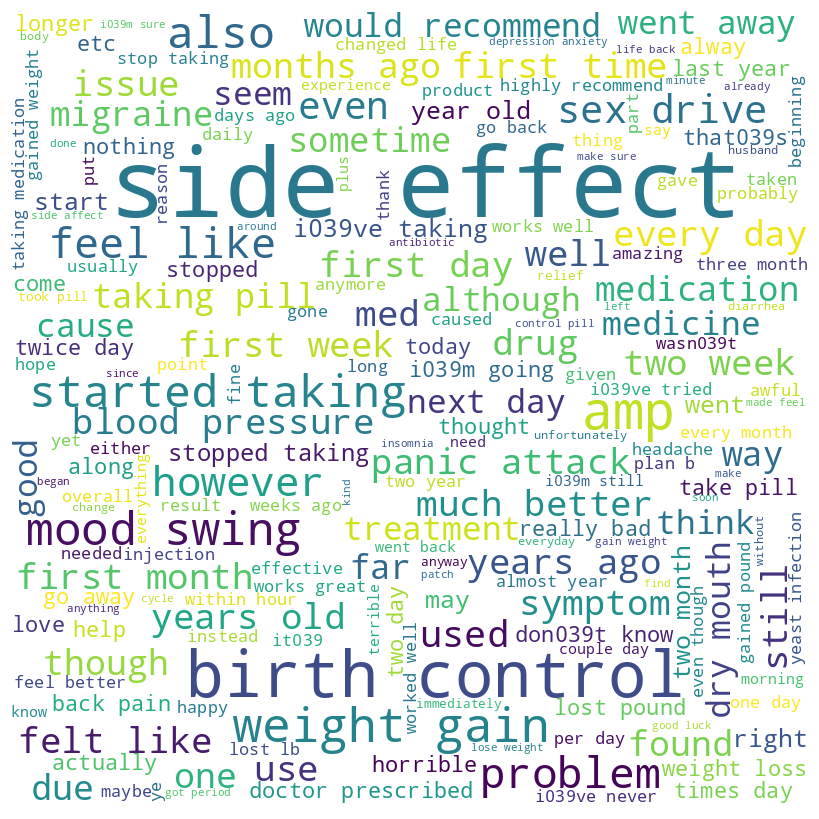

In [159]:
# Get the stopwords as a list
stopwords = list(stopwords.words('english'))

# Join all the reviews into a single string
reviews_text = " ".join(review for review in dfTrain['review'])

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [160]:
dfTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
9892,163935,a + d cracked skin relief,bacterial skin infection,severe cracked skin hands i039ve tried many di...,10,2007-12-09,6,0,80
18402,131173,a / b otic,otitis media,numbs pain makes ear feel heavier least throbb...,10,2009-09-23,20,1,515
77682,70749,abacavir / dolutegravir / lamivudine,hiv infection,update prior review triumeq 4 months third app...,10,2015-09-30,16,2,282
59740,70709,abacavir / dolutegravir / lamivudine,hiv infection,started taking triumeq almost two years diagno...,9,2001-09-16,17,2,282
90400,70706,abacavir / dolutegravir / lamivudine,hiv infection,taking complera 5 years switched triumec lil m...,4,2007-10-16,10,2,282
...,...,...,...,...,...,...,...,...,...
126244,163064,ella,emergency contraception,wanted share experience particularly young gir...,10,2017-11-28,2,3429,230
47965,163126,ella,emergency contraception,took ella 3 days little accident happened 14th...,8,2017-03-30,21,3429,230
159774,163077,ella,emergency contraception,two min unprotected sex bf didn039t ejaculated...,2,2006-10-17,1,3429,230
578,53296,femhrt,postmenopausal symptoms,medication completely changed life better also...,10,2011-01-11,42,3430,569


#### Tokenize the reviews

In [185]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(dfTrain["review"])

# Save the reviews tokenized to the dataframe
dfTrain['review_tokenized'] = dfTrain['review'].apply(lambda x: nltk.word_tokenize(x))

<159079x81444 sparse matrix of type '<class 'numpy.float64'>'
	with 5147582 stored elements in Compressed Sparse Row format>

#### Normalize

In [171]:
# Normalization of all the features
scaler = MinMaxScaler()
dfTrain[['rating', 'usefulCount']] = scaler.fit_transform(dfTrain[['rating', 'usefulCount']])
dfTrain

/tmp/ipykernel_1675/420406093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain[['rating', 'usefulCount']] = scaler.fit_transform(dfTrain[['rating', 'usefulCount']])


,uniqueID,drugName,condition,review,rating,date,usefulCount,drugName_cat,condition_cat
9892,163935,a + d cracked skin relief,bacterial skin infection,severe cracked skin hands i039ve tried many di...,1.000000,2007-12-09,0.004648,0,80
18402,131173,a / b otic,otitis media,numbs pain makes ear feel heavier least throbb...,1.000000,2009-09-23,0.015492,1,515
77682,70749,abacavir / dolutegravir / lamivudine,hiv infection,update prior review triumeq 4 months third app...,1.000000,2015-09-30,0.012393,2,282
59740,70709,abacavir / dolutegravir / lamivudine,hiv infection,started taking triumeq almost two years diagno...,0.888889,2001-09-16,0.013168,2,282
90400,70706,abacavir / dolutegravir / lamivudine,hiv infection,taking complera 5 years switched triumec lil m...,0.333333,2007-10-16,0.007746,2,282
...,...,...,...,...,...,...,...,...,...
126244,163064,ella,emergency contraception,wanted share experience particularly young gir...,1.000000,2017-11-28,0.001549,3429,230
47965,163126,ella,emergency contraception,took ella 3 days little accident happened 14th...,0.777778,2017-03-30,0.016266,3429,230
159774,163077,ella,emergency contraception,two min unprotected sex bf didn039t ejaculated...,0.111111,2006-10-17,0.000775,3429,230
578,53296,femhrt,postmenopausal symptoms,medication completely changed life better also...,1.000000,2011-01-11,0.032533,3430,569


#### x_train, y_train, x_val, y_val, x_test, y_test

In [181]:

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(reviews, dfTrain["condition"], test_size=0.25, random_state=42)

In [182]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119309, 81444), (39770, 81444), (119309,), (39770,))

#### Validation

In [183]:
# Transform the test data to have also a validation set
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [184]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((19885, 81444), (19885, 81444), (19885,), (19885,))

#### Feature Selection

In [ ]:
# Feature Selection
# define the number of features to select
k = 4

# create the pipeline with feature selection and neural network classifier
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=k)),
    ('clf', MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500))
])

# fit the pipeline to your data
pipeline.fit(X_train, y_train)

# evaluate the pipeline on test data
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)


NameError: name 'X_train' is not defined